In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('delivery_time.csv')


In [3]:
pip install seaborn

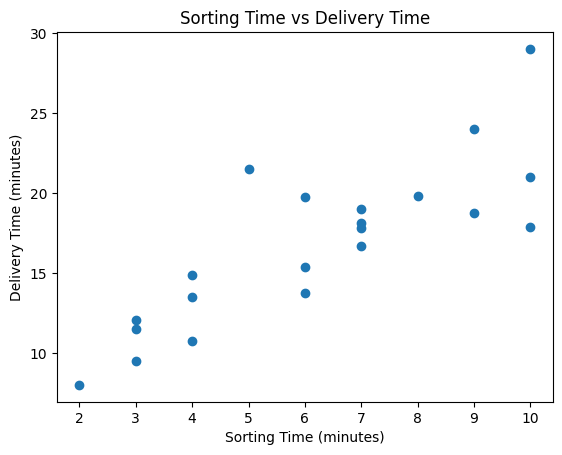

In [4]:
plt.scatter(data['Sorting Time'], data['Delivery Time'])
plt.title('Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


In [5]:
X = data['Sorting Time'].values.reshape(-1, 1)
y = data['Delivery Time'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.902588896697121
Mean Squared Error: 14.04673895663505
Root Mean Squared Error: 3.7478979383962754


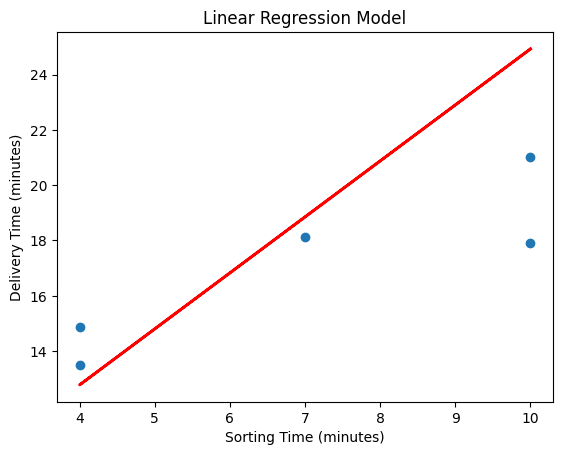

In [9]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression Model')
plt.xlabel('Sorting Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()

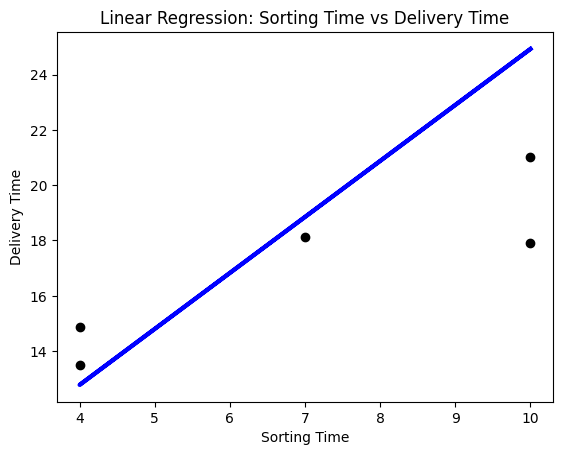

In [10]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

APPLYING POLYNOMIAL TRANSFORMATION AND CHECKING ACCURACY

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [12]:
import pandas as pd

In [13]:
data= pd.read_csv('delivery_time.csv')

In [14]:
df = pd.DataFrame(data)


In [15]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [16]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [17]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

In [18]:
y_pred_poly = lr_poly.predict(X_test_poly)

In [19]:
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)

In [20]:
print(f'Polynomial Model Mean Squared Error: {mse_poly}')
print(f'Polynomial Model R-squared: {r2_poly}')

Polynomial Model Mean Squared Error: 16.915311232358555
Polynomial Model R-squared: -1.4334319682136987


In [21]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline


In [25]:
lr_model = LinearRegression()
print('Initial Model:')
train_evaluate_model(lr_model, X_train, y_train, X_test, y_test)

Initial Model:
Mean Squared Error: 14.04673895663505
Root Mean Squared Error: 3.7478979383962754


In [29]:
model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])
print('\nModel with Standard Scaling:')
train_evaluate_model(model1, X_train, y_train, X_test, y_test)



Model with Standard Scaling:
Mean Squared Error: 14.04673895663505
Root Mean Squared Error: 3.7478979383962754


In [30]:
model2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('linear_regression', LinearRegression())
])
print('\nModel with Min-Max Scaling:')
train_evaluate_model(model2, X_train, y_train, X_test, y_test)



Model with Min-Max Scaling:
Mean Squared Error: 14.046738956635034
Root Mean Squared Error: 3.747897938396273


In [31]:
model3 = Pipeline([
    ('scaler', RobustScaler()),
    ('linear_regression', LinearRegression())
])
print('\nModel with Robust Scaling:')
train_evaluate_model(model3, X_train, y_train, X_test, y_test)


Model with Robust Scaling:
Mean Squared Error: 14.04673895663505
Root Mean Squared Error: 3.7478979383962754


In [33]:
model4 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])
print('\nModel with Polynomial Features (degree=2):')
train_evaluate_model(model4, X_train, y_train, X_test, y_test)


Model with Polynomial Features (degree=2):
Mean Squared Error: 16.915311232358555
Root Mean Squared Error: 4.112822781540502
